# Steps involved in creating a neural network #

1) Define the model
2) Compile the model
3) Fit the model


In [1]:
# Import iris dataset #
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'],iris['target']],
                    columns=iris['feature_names'] + ['target'])
iris_df = iris_df.loc[iris_df['target'] != 2]
feature_vector = iris_df.columns.str.contains('cm')
X = iris_df.loc[:,feature_vector]
Y = iris_df[['target']]

# Split the dataset into test and train datasets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.60, random_state=0)

# """
# Objective - Convert the dataset to binary dataset
# 1. Convert it to a dataframe. Why? What is a dataframe? DONE
# 2. Filter target with !=2 and features with corresponding value. DONE
# 3. What is the current data type of iris variable? DONE
#     + Bunch data type by sklearn. A dictionary with two numpy arrays -- data and target.
#     Contains additional details about the dataset as well.
# 4. Qs
#     + Cross check the parameters in train_test_split()
# """


# Logistic regression using DNN #
    1. The model
    2. Confusion matrix
    3. Classification report

__The Model__

In [10]:
### Logistic regression using DNN ###
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

np.random.seed(7)
nb_classes = 4

# Defining model #

model = Sequential()
model.add(Dense(1,input_dim=4,activation='sigmoid'))
# model.add(Dense(1))
# model.add(Activation('softmax'))
# model.add(Dense(16,activation='sigmoid'))
# model.add(Dense(1,activation='sigmoid'))

# Compile the model #

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model #

# model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=10)
model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0)
# model.fit(x_train, y_train, epochs=50, batch_size=1)
# How is the dataset distributed?
# model.fit(x_train, y_train, epochs=150, batch_size=10)
# model.summary()

# Evaluate the model #

scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# """
# Classification report and optimization
#     1. Adding an exhaustive classification report
#     2. Analyse the report
#     3. Improve the model
#     4. Cross check the existing code
# """


60/60 [==============================] - 0s 6ms/step

acc: 46.67%


**K fold cross validation**

In [13]:
# MLP for Pima Indians Dataset with 10-fold cross validation
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# # load pima indians dataset
# dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
# X = X.values
# Y = Y.values
# print(type(X))
for train, test in kfold.split(X, Y):
    # create model
    model = Sequential()
    model.add(Dense(1,input_dim=4,activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    # model.fit(X[train], Y[train], epochs=150, batch_size=10, verbose=0)
    model.fit(X.iloc[train], Y.iloc[train], epochs=120, batch_size=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(X.iloc[test], Y.iloc[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

acc: 100.00%
acc: 100.00%
acc: 100.00%
acc: 90.00%
acc: 100.00%
acc: 100.00%
acc: 100.00%
acc: 100.00%
acc: 100.00%
acc: 100.00%
99.00% (+/- 3.00%)


In [ ]:
# ROC Curve #

__Confusion Matrix__

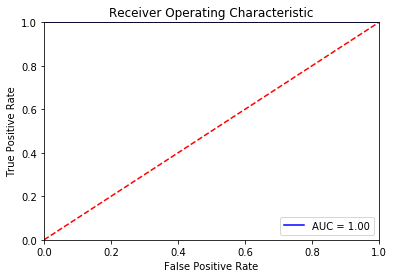

In [22]:
# Prediction #
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)
# print(y_pred)
y_pred = (y_pred>0.5)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Plot ROC curve. Sensitivity vs specificity
# Try changing the threshold value
# prediction.shape
# print(prediction)

# Creating the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
# Remove the 3rd class #
# Loss function and response variable encoding(y_observed) #

__Classification Report__

In [5]:
target_names = [iris.target_names[0], iris.target_names[1]]
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        32
 versicolor       1.00      1.00      1.00        28

avg / total       1.00      1.00      1.00        60



# SVM using DNN #

    1. The model
    2. Confusion matrix
    3. Classification report

In [6]:
### SVM using DNN ###

# Defining model #
np.random.seed(7)

model = Sequential()
model.add(Dense(1,input_dim=4,activation='linear'))
# model.add(Dense(1,activation='linear'))

# Compile the model #

model.compile(loss='categorical_hinge', optimizer='adam', metrics=['accuracy'])

# Fit the model #

model.fit(X, Y, epochs=60, batch_size=10)

# Evaluate the model #

scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/60
100/100 [==============================] - 0s 3ms/step - loss: 1.8721 - acc: 0.1100
Epoch 2/60
100/100 [==============================] - 0s 110us/step - loss: 1.8194 - acc: 0.2200
Epoch 3/60
100/100 [==============================] - 0s 79us/step - loss: 1.7660 - acc: 0.3900
Epoch 4/60
100/100 [==============================] - 0s 120us/step - loss: 1.7166 - acc: 0.4800
Epoch 5/60
100/100 [==============================] - 0s 80us/step - loss: 1.6821 - acc: 0.5000
Epoch 6/60
100/100 [==============================] - 0s 100us/step - loss: 1.6562 - acc: 0.5000
Epoch 7/60
100/100 [==============================] - 0s 70us/step - loss: 1.6399 - acc: 0.5000
Epoch 8/60
100/100 [==============================] - 0s 90us/step - loss: 1.6244 - acc: 0.5000
Epoch 9/60
100/100 [==============================] - 0s 60us/step - loss: 1.6092 - acc: 0.5000
Epoch 10/60
100/100 [==============================] - 0s 70us/step - loss: 1.5913 - acc: 0.5000
Epoch 11/60
100/100 [================

# Qs/Doubts #
1. Core methods to analyse
    + Sequential
    + add
    + compile
    + fit
    + evaluate
2. What exactly is sequential for?
3. Classification report
    + precision
    + recall
    + f1 score
    + support
